# Multivariate Linear Regression

We are going to do linear regression, using 2 features.
1. Body Masses (kg)
2. Work levels (calories/hour)

With that we are going to predict the heat level produced (calories).

First we extract the data. We display the data in two plots:
1. bodymass/heat
2. work level/heat

Then we will use a simple self-implemented gradient descent algorithm to create a prediction. Specifically 'batch' gradient descent.

In [55]:
import numpy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


The data is contained in a file called "muscle1.dat". It is stored as follows:

    mass    work_level    heat_output
We need to format this to an array afterwards.

In [4]:
# Extract data
file_name = "muscle1.dat"
with open(file_name, 'r') as f:
    raw_data = f.readlines()

# show part of data we are working with
print(raw_data[0])

    43.7      19     177



In [35]:
# change to arrays
data_x = numpy.empty(shape=(len(raw_data),2))
data_y = numpy.empty(shape=(len(raw_data)))

for i, line in enumerate(raw_data):
    line_data = ' '.join(line.split()).split()
    
    data_x[i] = [line_data[0], line_data[1]]
    data_y[i] = line_data[2]

# print example data
print(data_x[3])
print(data_y[3])

[54.6 13. ]
160.0


# Visualization
We have all the data. We are not going to normalize it. We also do not need a test dataset.

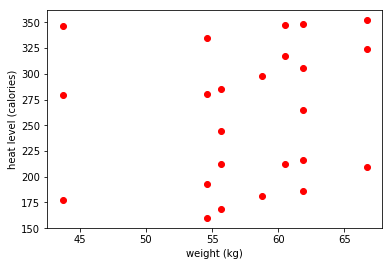

In [32]:
# Make your plot, set your axes labels
plt.plot(data_x[:, 0], data_y, 'ro') # data[:, 0] gets the first column of an numpy array
plt.xlabel('weight (kg)')
plt.ylabel('heat level (calories)')

plt.show()

This looks pretty random, but their is probably a coherence with the other data.

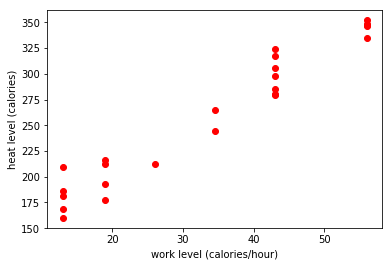

In [33]:
# Make your plot, set your axes labels
plt.plot(data_x[:, 1], data_y, 'ro') # data[:, 1] gets the first column of an numpy array
plt.xlabel('work level (calories/hour)')
plt.ylabel('heat level (calories)')

plt.show()

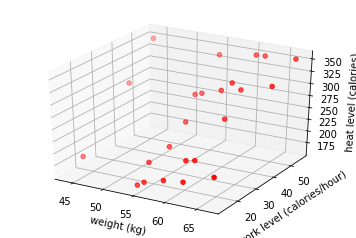

In [58]:
# Make your plot, set your axes labels

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data_x[:, 0], data_x[:, 1], data_y, c='r', marker='o')

ax.set_xlabel('weight (kg)')
ax.set_ylabel('work level (calories/hour)')
ax.set_zlabel('heat level (calories)')

plt.show()

# Training

Now we can start training, this shouldn't take too many epochs if we set the learning rate correctly. The dataset is also very small so training will go very fast.

In [95]:
epochs = 1000
learning_rate = 0.000000001

def hypotisis(weights, data):
    """
    @param data: this should be in the shape (..., 3) 
                 where the whole one of the columns should be 1 to be used as a bias
    """
    transposed = numpy.transpose(weights)
    return numpy.dot(transposed, data)


def sgd(data_x, data_y, epochs=100, l_rate=0.0001):
    weights = numpy.zeros(shape=(3))
    
    len_data = data_y.size

    for epoch in range(epochs):
        weights_temp = numpy.zeros(shape=(3))
        
        for i in range(len_data):
            for feature_num in range(weights_temp.size):
                h = hypotisis(weights, data_x[i])
                result = l_rate*((h - data_y[i])*data_x[i][feature_num])/len_data
                weights_temp[feature_num] -= result
                
        print(weights_temp)
        print(weights)
        weights -= weights_temp
        print(weights)
    return weights

# add ones to the end of the x dataset so the last weight is also the bias
new_column = numpy.ones(shape=(data_y.size, 1))
data_x_extended = numpy.append(data_x, new_column, 1)

weights = sgd(data_x_extended, data_y, epochs, learning_rate)

print("weights: ", weights)

[1.50229083e-05 9.85810417e-06 2.60041667e-07]
[0. 0. 0.]
[-1.50229083e-05 -9.85810417e-06 -2.60041667e-07]
[1.50229780e-05 9.85814751e-06 2.60042867e-07]
[-1.50229083e-05 -9.85810417e-06 -2.60041667e-07]
[-3.00458863e-05 -1.97162517e-05 -5.20084534e-07]
[1.50230477e-05 9.85819086e-06 2.60044067e-07]
[-3.00458863e-05 -1.97162517e-05 -5.20084534e-07]
[-4.50689340e-05 -2.95744425e-05 -7.80128601e-07]
[1.50231173e-05 9.85823421e-06 2.60045268e-07]
[-4.50689340e-05 -2.95744425e-05 -7.80128601e-07]
[-6.00920513e-05 -3.94326767e-05 -1.04017387e-06]
[1.50231870e-05 9.85827756e-06 2.60046468e-07]
[-6.00920513e-05 -3.94326767e-05 -1.04017387e-06]
[-7.51152383e-05 -4.92909543e-05 -1.30022034e-06]
[1.50232567e-05 9.85832090e-06 2.60047668e-07]
[-7.51152383e-05 -4.92909543e-05 -1.30022034e-06]
[-9.01384950e-05 -5.91492752e-05 -1.56026800e-06]
[1.50233263e-05 9.85836425e-06 2.60048868e-07]
[-9.01384950e-05 -5.91492752e-05 -1.56026800e-06]
[-1.05161821e-04 -6.90076395e-05 -1.82031687e-06]
[1.5023396

[1.50444499e-05 9.87150778e-06 2.60412817e-07]
[-4.64539529e-03 -3.04821786e-03 -8.04100187e-05]
[-4.66043974e-03 -3.05808937e-03 -8.06704315e-05]
[1.50445196e-05 9.87155119e-06 2.60414019e-07]
[-4.66043974e-03 -3.05808937e-03 -8.06704315e-05]
[-4.67548426e-03 -3.06796092e-03 -8.09308455e-05]
[1.50445894e-05 9.87159460e-06 2.60415221e-07]
[-4.67548426e-03 -3.06796092e-03 -8.09308455e-05]
[-4.69052884e-03 -3.07783251e-03 -8.11912608e-05]
[1.50446591e-05 9.87163800e-06 2.60416423e-07]
[-4.69052884e-03 -3.07783251e-03 -8.11912608e-05]
[-4.70557350e-03 -3.08770415e-03 -8.14516772e-05]
[1.50447289e-05 9.87168141e-06 2.60417625e-07]
[-4.70557350e-03 -3.08770415e-03 -8.14516772e-05]
[-4.72061823e-03 -3.09757583e-03 -8.17120948e-05]
[1.50447987e-05 9.87172482e-06 2.60418827e-07]
[-4.72061823e-03 -3.09757583e-03 -8.17120948e-05]
[-4.73566303e-03 -3.10744756e-03 -8.19725136e-05]
[1.50448684e-05 9.87176823e-06 2.60420029e-07]
[-4.73566303e-03 -3.10744756e-03 -8.19725136e-05]
[-4.75070790e-03 -3.1

[-0.00934265 -0.00613024 -0.00016172]
[1.50662314e-05 9.88506070e-06 2.60788103e-07]
[-0.00934265 -0.00613024 -0.00016172]
[-0.00935772 -0.00614012 -0.00016198]
[1.50663013e-05 9.88510417e-06 2.60789307e-07]
[-0.00935772 -0.00614012 -0.00016198]
[-0.00937278 -0.00615001 -0.00016224]
[1.50663711e-05 9.88514764e-06 2.60790511e-07]
[-0.00937278 -0.00615001 -0.00016224]
[-0.00938785 -0.00615989 -0.0001625 ]
[1.50664410e-05 9.88519111e-06 2.60791715e-07]
[-0.00938785 -0.00615989 -0.0001625 ]
[-0.00940292 -0.00616978 -0.00016276]
[1.50665109e-05 9.88523458e-06 2.60792918e-07]
[-0.00940292 -0.00616978 -0.00016276]
[-0.00941798 -0.00617966 -0.00016302]
[1.50665807e-05 9.88527805e-06 2.60794122e-07]
[-0.00941798 -0.00617966 -0.00016302]
[-0.00943305 -0.00618955 -0.00016328]
[1.50666506e-05 9.88532152e-06 2.60795326e-07]
[-0.00943305 -0.00618955 -0.00016328]
[-0.00944811 -0.00619943 -0.00016354]
[1.50667205e-05 9.88536499e-06 2.60796529e-07]
[-0.00944811 -0.00619943 -0.00016354]
[-0.00946318 -0.

[-0.01395618 -0.00915709 -0.00024157]
[1.50876243e-05 9.89837173e-06 2.61156693e-07]
[-0.01395618 -0.00915709 -0.00024157]
[-0.01397127 -0.00916699 -0.00024184]
[1.50876942e-05 9.89841526e-06 2.61157898e-07]
[-0.01397127 -0.00916699 -0.00024184]
[-0.01398635 -0.00917689 -0.0002421 ]
[1.50877642e-05 9.89845879e-06 2.61159103e-07]
[-0.01398635 -0.00917689 -0.0002421 ]
[-0.01400144 -0.00918679 -0.00024236]
[1.50878342e-05 9.89850232e-06 2.61160309e-07]
[-0.01400144 -0.00918679 -0.00024236]
[-0.01401653 -0.00919669 -0.00024262]
[1.50879041e-05 9.89854585e-06 2.61161514e-07]
[-0.01401653 -0.00919669 -0.00024262]
[-0.01403162 -0.00920659 -0.00024288]
[1.50879741e-05 9.89858938e-06 2.61162720e-07]
[-0.01403162 -0.00920659 -0.00024288]
[-0.01404671 -0.00921648 -0.00024314]
[1.50880440e-05 9.89863291e-06 2.61163925e-07]
[-0.01404671 -0.00921648 -0.00024314]
[-0.01406179 -0.00922638 -0.0002434 ]
[1.50881140e-05 9.89867645e-06 2.61165131e-07]
[-0.01406179 -0.00922638 -0.0002434 ]
[-0.01407688 -0.

# Test

To see how well we did we are going to look at the prediction in a 3d scatterplot.

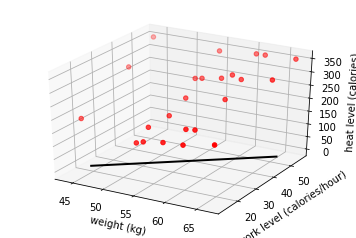

In [96]:
# Make your plot, set your axes labels

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data_x[:, 0], data_x[:, 1], data_y, c='r', marker='o')

ax.set_xlabel('weight (kg)')
ax.set_ylabel('work level (calories/hour)')
ax.set_zlabel('heat level (calories)')

points_x = [[45, 19, 1], [66, 50, 1]]
points_y = [hypotisis(weights, points_x[0]), hypotisis(weights, points_x[1])]


plt.plot([points_x[0][0], points_x[1][0]], 
         [points_x[0][1], points_x[1][1]], 
          points_y, 'k-', lw=2)


plt.show()